<a href="https://colab.research.google.com/github/Kalaiselvan88/MLAssignments/blob/main/Upgrad_Stack_Overflow_Case_Study_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Analysis and answering questions

#### Let us first load the Stackoverflow data from Amazon S3

In [ ]:
import pandas as pd

quesurl = "https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Questions.csv"
ansurl = "https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Answers.csv"
tagsurl = "https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Tags.csv"
usersurl = "https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Users.csv"

dfq = pd.read_csv(quesurl,encoding = "ISO-8859-1")
dfa = pd.read_csv(ansurl,encoding = "ISO-8859-1")
dft = pd.read_csv(tagsurl,encoding = "ISO-8859-1")
dfu = pd.read_csv(usersurl,encoding = "ISO-8859-1")



#### Data cleaning for each of the dataset

In [ ]:
# Question Dataframe
dfq.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [ ]:
# Let us have a look at number of NULL values in each column
dfq.isnull().sum()

Id                    0
OwnerUserId       14454
CreationDate          0
ClosedDate      1208257
Score                 0
Title                 0
Body                  0
dtype: int64

In [ ]:
# Checking at the NULL values in OwnerUserId column
dfq[dfq['OwnerUserId'].isnull()]

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
47,4170,NaN,2008-08-07T00:25:03Z,NaN,9,How to learn ADO.NET,<p>I need to learn ADO.NET to build applicatio...
130,12330,NaN,2008-08-15T15:06:31Z,NaN,6,Programmatically list WMI classes and their pr...,"<p>Hey everyone, \nIs there any known way of l..."
158,15190,NaN,2008-08-18T20:32:49Z,NaN,2,Changing CURRENT save/default directory in Del...,<p>I have a project group that contains a proj...
198,18250,NaN,2008-08-20T15:40:53Z,NaN,0,Creation Date of Compiled Executable (VC++ 2005),<p>The creation date of an executable linked i...
300,29100,NaN,2008-08-26T22:28:22Z,NaN,5,How are you generating tests from specifications?,"<p>I came across a printed <a href=""http://www..."
...,...,...,...,...,...,...,...
1261359,40076260,NaN,2016-10-16T22:38:59Z,NaN,1,How can I find out if two lines overlap?,<p>My function takes two objects that represen...
1261501,40079260,NaN,2016-10-10T15:10:51Z,NaN,0,"VB6.0 ""Run - time error '3709': The connection...","<p><a href=""http://i.stack.imgur.com/M2EV8.png..."
1263664,40130890,NaN,2016-10-19T12:02:24Z,2016-10-19T20:52:39Z,-4,How would i change my program so that the colo...,"<p><div class=""snippet"" data-lang=""js"" data-hi..."
1263908,40136590,NaN,2016-10-19T13:24:10Z,2016-10-19T16:37:57Z,0,Names of variables inside the 'for loop',<p>In <strong>my_data</strong> I want to creat...


In [ ]:
# It is necessary that we must be logged in order to post questions in stack overflow. 
# Hence it does not make any sense to have questions without OwnerUserId and we can remove it from our dataset.
dfq = dfq[~dfq['OwnerUserId'].isnull()]
dfq.isnull().sum()

Id                    0
OwnerUserId           0
CreationDate          0
ClosedDate      1194522
Score                 0
Title                 0
Body                  0
dtype: int64

In [ ]:
# Checking at the NULL values in ClosedDate column
dfq[dfq['ClosedDate'].isnull()]

# It is possible that the question is not yet closed and hence we do not have a date. Hence these values can be left as such. 

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
5,330,63.0,2008-08-02T02:51:36Z,NaN,29,Should I use nested classes in this case?,<p>I am working on a collection of classes use...
...,...,...,...,...,...,...,...
1264211,40143210,5610777.0,2016-10-19T23:38:01Z,NaN,0,URL routing in PHP (MVC),<p>I am building a custom MVC project and I ha...
1264212,40143300,3791161.0,2016-10-19T23:48:09Z,NaN,0,Bigquery.Jobs.Insert - Resumable Upload?,<p>The API docs show that you should be able t...
1264213,40143340,7028647.0,2016-10-19T23:52:50Z,NaN,1,Obfuscating code in android studio,<p>Under minifyEnabled I changed from false to...
1264214,40143360,871677.0,2016-10-19T23:55:24Z,NaN,0,How to fire function after v-model change?,<p>I have input which I use to filter my array...


In [ ]:
# Now let us check the data type of each of the column
dfq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249762 entries, 0 to 1264215
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Id            1249762 non-null  int64  
 1   OwnerUserId   1249762 non-null  float64
 2   CreationDate  1249762 non-null  object 
 3   ClosedDate    55240 non-null    object 
 4   Score         1249762 non-null  int64  
 5   Title         1249762 non-null  object 
 6   Body          1249762 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 76.3+ MB


In [ ]:
# CreationDate and ClosedDate columns are supposed to be date datetype
dfq['CreationDate'] = pd.to_datetime(dfq['CreationDate'])
dfq['ClosedDate'] = pd.to_datetime(dfq['ClosedDate'])

dfq.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249762 entries, 0 to 1264215
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype              
---  ------        --------------    -----              
 0   Id            1249762 non-null  int64              
 1   OwnerUserId   1249762 non-null  float64            
 2   CreationDate  1249762 non-null  datetime64[ns, UTC]
 3   ClosedDate    55240 non-null    datetime64[ns, UTC]
 4   Score         1249762 non-null  int64              
 5   Title         1249762 non-null  object             
 6   Body          1249762 non-null  object             
dtypes: datetime64[ns, UTC](2), float64(1), int64(2), object(2)
memory usage: 76.3+ MB


In [ ]:
# The OwnerUserId column is in decimal. 
# But let us first check if there is any value after decimal and convert to integer since ID's are usually not in decimals
import numpy as np
np.array_equal(dfq.OwnerUserId, dfq.OwnerUserId.astype(int))

True

In [ ]:
# Since there is no decimal part, converting the OwnerUserId to integer type
dfq['OwnerUserId'] = dfq['OwnerUserId'].astype('int64')
dfq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249762 entries, 0 to 1264215
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype              
---  ------        --------------    -----              
 0   Id            1249762 non-null  int64              
 1   OwnerUserId   1249762 non-null  int64              
 2   CreationDate  1249762 non-null  datetime64[ns, UTC]
 3   ClosedDate    55240 non-null    datetime64[ns, UTC]
 4   Score         1249762 non-null  int64              
 5   Title         1249762 non-null  object             
 6   Body          1249762 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(3), object(2)
memory usage: 76.3+ MB


In [ ]:
# Let us try using describe to check if we can find any discrepancy
dfq.describe()

# There seems to be nothing abnormal

,Id,OwnerUserId,Score
count,1.249762e+06,1.249762e+06,1.249762e+06
mean,2.140840e+07,2.155177e+06,1.770194e+00
std,1.148375e+07,1.801265e+06,1.365188e+01
min,8.000000e+01,1.000000e+00,-7.300000e+01
25%,1.152718e+07,6.589110e+05,0.000000e+00
50%,2.182016e+07,1.611830e+06,0.000000e+00
75%,3.160539e+07,3.353792e+06,1.000000e+00
max,4.014338e+07,7.046594e+06,5.190000e+03


In [ ]:
# Checking the answers dataset
dfa.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [ ]:
dfa.isnull().sum()

# Since it is possible to answer questions anonymous, we can leave the NULL values for OwnerUserId

Id                  0
OwnerUserId     13200
CreationDate        0
ParentId            0
Score               0
Body                0
dtype: int64

In [ ]:
# Checking the data type of each of the column
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014516 entries, 0 to 2014515
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Id            int64  
 1   OwnerUserId   float64
 2   CreationDate  object 
 3   ParentId      int64  
 4   Score         int64  
 5   Body          object 
dtypes: float64(1), int64(3), object(2)
memory usage: 92.2+ MB


In [ ]:
# Here we need to change the CreationDate datatype to Date Time
dfa['CreationDate'] = pd.to_datetime(dfa['CreationDate'])
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014516 entries, 0 to 2014515
Data columns (total 6 columns):
 #   Column        Dtype              
---  ------        -----              
 0   Id            int64              
 1   OwnerUserId   float64            
 2   CreationDate  datetime64[ns, UTC]
 3   ParentId      int64              
 4   Score         int64              
 5   Body          object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(1)
memory usage: 92.2+ MB


In [ ]:
# Let us fillna with 0 to denote NULL values
dfa['OwnerUserId'] = dfa['OwnerUserId'].fillna(value=0)

# Again running to check if the column can be converted to integer
np.array_equal(dfa.OwnerUserId, dfa.OwnerUserId.astype(int))

True

In [ ]:
# The OwnerUserId column is in decimal. 
# But let us first check if there is any value after decimal and convert to integer since ID's are usually not in decimals
dfa['OwnerUserId'] = dfa['OwnerUserId'].astype('int64')
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014516 entries, 0 to 2014515
Data columns (total 6 columns):
 #   Column        Dtype              
---  ------        -----              
 0   Id            int64              
 1   OwnerUserId   int64              
 2   CreationDate  datetime64[ns, UTC]
 3   ParentId      int64              
 4   Score         int64              
 5   Body          object             
dtypes: datetime64[ns, UTC](1), int64(4), object(1)
memory usage: 92.2+ MB


In [ ]:
# Let us try using describe to find if there is anything abnormal and there is nothing abnormal
dfa.describe()

,Id,OwnerUserId,ParentId,Score
count,2.014516e+06,2.014516e+06,2.014516e+06,2.014516e+06
mean,1.915490e+07,1.477866e+06,1.808390e+07,2.480563e+00
std,1.168713e+07,1.548626e+06,1.169152e+07,1.590938e+01
min,9.200000e+01,0.000000e+00,8.000000e+01,-4.200000e+01
25%,8.854490e+06,2.705910e+05,7.692900e+06,0.000000e+00
50%,1.866246e+07,9.417760e+05,1.712404e+07,1.000000e+00
75%,2.929756e+07,2.183804e+06,2.804977e+07,2.000000e+00
max,4.014339e+07,7.045028e+06,4.014319e+07,5.718000e+03


In [ ]:
# Checking at the tags table
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750994 entries, 0 to 3750993
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Tag     object
dtypes: int64(1), object(1)
memory usage: 57.2+ MB


In [ ]:
dft.isnull().sum()

Id        0
Tag    1113
dtype: int64

In [ ]:
# Since there is no use in having rows which does not contain any data let us remove them
dft = dft[~dft.Tag.isnull()]
dft.isnull().sum()

Id     0
Tag    0
dtype: int64

In [ ]:
# Let us know check the users table
dfu.head()

,Unnamed: 0,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
1,1,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
2,2,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
3,3,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
4,4,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547


In [ ]:
dfu.isnull().sum()

Unnamed: 0            0
id                    0
display_name        136
creation_date         0
last_access_date      0
reputation            0
up_votes              0
down_votes            0
views                 0
dtype: int64

In [ ]:
dfu[dfu['display_name'].isnull()]
# Looking at below values, there seems to be good reputation and maybe display name might have been optional. So let us leave the data as such.

,Unnamed: 0,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
129535,129535,25411,NaN,2008-10-06 07:27:24.897 UTC,2018-01-14 16:29:00.133 UTC,5933,46,4,474
129536,129536,25411,NaN,2008-10-06 07:27:24.897 UTC,2018-01-14 16:29:00.133 UTC,5933,46,4,474
129537,129537,25411,NaN,2008-10-06 07:27:24.897 UTC,2018-01-14 16:29:00.133 UTC,5933,46,4,474
129538,129538,25411,NaN,2008-10-06 07:27:24.897 UTC,2018-01-14 16:29:00.133 UTC,5933,46,4,474
129539,129539,25411,NaN,2008-10-06 07:27:24.897 UTC,2018-01-14 16:29:00.133 UTC,5933,46,4,474
...,...,...,...,...,...,...,...,...,...
1910383,1910383,5002677,NaN,2015-06-12 10:05:18.607 UTC,2019-08-28 07:56:46.787 UTC,1298,1123,200,235
1910384,1910384,5002677,NaN,2015-06-12 10:05:18.607 UTC,2019-08-28 07:56:46.787 UTC,1298,1123,200,235
1910385,1910385,5002677,NaN,2015-06-12 10:05:18.607 UTC,2019-08-28 07:56:46.787 UTC,1298,1123,200,235
1966283,1966283,6529875,NaN,2016-06-29 18:10:36.103 UTC,2019-08-27 18:05:10.017 UTC,142,4,0,17


In [ ]:
dfu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990480 entries, 0 to 1990479
Data columns (total 9 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Unnamed: 0        int64 
 1   id                int64 
 2   display_name      object
 3   creation_date     object
 4   last_access_date  object
 5   reputation        int64 
 6   up_votes          int64 
 7   down_votes        int64 
 8   views             int64 
dtypes: int64(6), object(3)
memory usage: 136.7+ MB


In [ ]:
# Let us convert the creation_date and last_access_date dates to correct format
dfu['creation_date'] = pd.to_datetime(dfu['creation_date'])
dfu['last_access_date'] = pd.to_datetime(dfu['last_access_date'])
dfu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990480 entries, 0 to 1990479
Data columns (total 9 columns):
 #   Column            Dtype              
---  ------            -----              
 0   Unnamed: 0        int64              
 1   id                int64              
 2   display_name      object             
 3   creation_date     datetime64[ns, UTC]
 4   last_access_date  datetime64[ns, UTC]
 5   reputation        int64              
 6   up_votes          int64              
 7   down_votes        int64              
 8   views             int64              
dtypes: datetime64[ns, UTC](2), int64(6), object(1)
memory usage: 136.7+ MB


In [ ]:
dfu.head()

,Unnamed: 0,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,0,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
1,1,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
2,2,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
3,3,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
4,4,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547


In [ ]:
# We can see that there is an Unnamed column with some values. This column is not given in data dictinary and hence not required.
dfu.drop('Unnamed: 0',axis=1,inplace=True)
dfu

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
1,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
2,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
3,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
4,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
...,...,...,...,...,...,...,...,...
1990475,4228492,Michael Spranger,2014-11-07 20:21:14.283000+00:00,2019-08-28 18:01:29.560000+00:00,415,112,2,17
1990476,6820506,Manuela,2016-09-12 00:19:17.830000+00:00,2018-07-20 01:28:24.853000+00:00,21,38,0,50
1990477,4464432,YTorii,2015-01-17 10:48:17.523000+00:00,2019-08-31 13:51:47.413000+00:00,336,67,1,13
1990478,4605946,space_voyager,2015-02-25 13:43:24.630000+00:00,2019-07-13 23:55:47.607000+00:00,884,53,1,191


In [ ]:
# Let us try using describe to find if there is anything abnormal. There seems to be none.
dfu.describe()

,id,reputation,up_votes,down_votes,views
count,1.990480e+06,1.990480e+06,1.990480e+06,1.990480e+06,1.990480e+06
mean,1.480737e+06,4.545504e+04,1.539702e+03,8.212407e+02,9.450821e+03
std,1.543848e+06,1.226378e+05,3.494248e+03,4.199035e+03,7.877572e+04
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.797618e+05,9.310000e+02,5.800000e+01,2.000000e+00,1.090000e+02
50%,9.494760e+05,5.042000e+03,3.530000e+02,1.800000e+01,5.290000e+02
75%,2.183668e+06,2.806100e+04,1.470000e+03,1.490000e+02,2.675000e+03
max,7.045028e+06,1.128126e+06,1.005200e+05,7.495500e+04,1.835157e+06


#### Now let us proceed with merging the datasets and then cleaning the same

In [ ]:
# Merging the questions and Tags dataframe based on Id
dfmerged = pd.merge(dfq,dft,how='left',suffixes=('_ques','_tag'))
dfmerged

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Tag
0,80,26,2008-08-01 13:57:07+00:00,NaT,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,flex
1,80,26,2008-08-01 13:57:07+00:00,NaT,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,actionscript-3
2,80,26,2008-08-01 13:57:07+00:00,NaT,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,air
3,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,svn
4,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,tortoisesvn
...,...,...,...,...,...,...,...,...
3709143,40143360,871677,2016-10-19 23:55:24+00:00,NaT,0,How to fire function after v-model change?,<p>I have input which I use to filter my array...,javascript
3709144,40143360,871677,2016-10-19 23:55:24+00:00,NaT,0,How to fire function after v-model change?,<p>I have input which I use to filter my array...,vue.js
3709145,40143380,6823982,2016-10-19 23:57:31+00:00,NaT,0,npm run mocha test - files being cached,<p>I'm running a mocha test and I noticed my c...,npm
3709146,40143380,6823982,2016-10-19 23:57:31+00:00,NaT,0,npm run mocha test - files being cached,<p>I'm running a mocha test and I noticed my c...,mocha


In [ ]:
dfmerged[dfmerged['Tag'].isnull()]

# In our analysis we are more interested on questions with tags. 
# Also since there are only 2 rows it is not a big loss in data.

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Tag
2354264,27319710,4329334,2014-12-05 15:50:58+00:00,NaT,0,My code returns several nulls and I can't figu...,<p>My assignment is to make a method that retu...,NaN
2599204,29853820,4829526,2015-04-24 17:26:59+00:00,NaT,-2,Null Pointer Error in Setter for Array?,<p>I keep getting a null point error on the se...,NaN


In [ ]:
# Removing questions without tags
dfmerged = dfmerged[~dfmerged['Tag'].isnull()]
dfmerged

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Tag
0,80,26,2008-08-01 13:57:07+00:00,NaT,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,flex
1,80,26,2008-08-01 13:57:07+00:00,NaT,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,actionscript-3
2,80,26,2008-08-01 13:57:07+00:00,NaT,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,air
3,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,svn
4,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,tortoisesvn
...,...,...,...,...,...,...,...,...
3709143,40143360,871677,2016-10-19 23:55:24+00:00,NaT,0,How to fire function after v-model change?,<p>I have input which I use to filter my array...,javascript
3709144,40143360,871677,2016-10-19 23:55:24+00:00,NaT,0,How to fire function after v-model change?,<p>I have input which I use to filter my array...,vue.js
3709145,40143380,6823982,2016-10-19 23:57:31+00:00,NaT,0,npm run mocha test - files being cached,<p>I'm running a mocha test and I noticed my c...,npm
3709146,40143380,6823982,2016-10-19 23:57:31+00:00,NaT,0,npm run mocha test - files being cached,<p>I'm running a mocha test and I noticed my c...,mocha


In [ ]:
# Now let us remove the duplicate rows by merging the Tags with comma as delimiter
dfmerged = dfmerged.groupby(['Id','OwnerUserId','CreationDate','ClosedDate','Score','Title','Body'])['Tag'].apply(','.join).reset_index()
dfmerged

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Tag
0,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn,tortoisesvn,branch,branching-and-merging"
1,470,71,2008-08-02 15:11:47+00:00,2016-03-26 05:23:29+00:00,13,Homegrown consumption of web services,<p>I've been writing a few web services for a ...,".net,web-services"
2,2540,136,2008-08-05 16:30:37+00:00,2014-04-03 15:36:28+00:00,39,Good STL-like library for C,<p>What are good libraries for C with datastru...,"c,architecture,data-structures"
3,2630,17,2008-08-05 18:01:32+00:00,2012-02-22 01:58:23+00:00,14,What are your favorite Powershell Cmdlets?,<p>I just found /n softwares free Powershell N...,"powershell,cmdlets"
4,2970,58,2008-08-05 23:55:25+00:00,2012-03-06 03:17:01+00:00,17,My website got hacked... What should I do?,<p>My dad called me today and said people goin...,"security,cracking,hijacked"
...,...,...,...,...,...,...,...,...
55235,40141810,7044612,2016-10-19 21:29:05+00:00,2016-10-19 21:41:54+00:00,-1,Windows - Where can I find a system() list of ...,<p>This is my first question here in StackOver...,"operating-system,system"
55236,40142370,7044756,2016-10-19 22:12:46+00:00,2016-10-19 22:17:45+00:00,-6,How can i find value of first zero in base 2,<p>I'm tried to write a program to find value ...,c
55237,40142450,6247467,2016-10-19 22:19:45+00:00,2016-10-19 23:06:30+00:00,-1,C# thread report found items,<p>Lets say I want to make a program that find...,"c#,multithreading,events"
55238,40142600,7044841,2016-10-19 22:33:00+00:00,2016-10-19 22:34:48+00:00,-10,Remove white spaces without replace(),<pre><code>def compress(s):\n âââ(str...,python


In [ ]:
# Merging the questions, tags with answers table
dfmerged = pd.merge(dfmerged,dfa,how='left',suffixes=('_ques','_ans'), left_on='Id', right_on='ParentId')

In [ ]:
# These are questions which do not have any answers. Let us keep this as we might need this data to derive information about most popular topic
dfmerged[dfmerged.Id_ans.isnull()]

,Id_ques,OwnerUserId_ques,CreationDate_ques,ClosedDate,Score_ques,Title,Body_ques,Tag,Id_ans,OwnerUserId_ans,CreationDate_ans,ParentId,Score_ans,Body_ans
1835,122670,5056,2008-09-23 18:04:36+00:00,2013-12-31 16:35:28+00:00,46,What is the LINQ way to implode/join a string ...,<p>I have the following string array:</p>\n\n<...,".net,linq,string",NaN,NaN,NaT,NaN,NaN,NaN
3064,270460,34395,2008-11-06 21:53:46+00:00,2016-08-14 09:56:48+00:00,5,DTD Validation With Python?,<p>I was wondering which of the built in pytho...,"python,xml",NaN,NaN,NaT,NaN,NaN,NaN
3622,375910,4893,2008-12-17 20:28:25+00:00,2011-08-30 13:13:05+00:00,10,Creating a Temp Dir in Java,<blockquote>\n <p><strong>Possible Duplicate:...,java,NaN,NaN,NaT,NaN,NaN,NaN
4638,525490,20955,2009-02-08 10:15:21+00:00,2013-12-30 03:04:01+00:00,1,open file select dialog with javascript,"<p>I have hidden input type=file field, and i ...","javascript,mootools",NaN,NaN,NaT,NaN,NaN,NaN
5152,620650,41661,2009-03-06 22:16:46+00:00,2013-11-04 01:41:37+00:00,21,Can I easily update all local git branches fro...,<p>I have a git repository with (at present) t...,"git,version-control,branch",NaN,NaN,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105703,40140360,3691554,2016-10-19 19:52:22+00:00,2016-10-19 19:59:35+00:00,-5,How does jar size and program code compare acr...,<p>Using the standard (mutable) array/list typ...,"java,scala,kotlin,filesize",NaN,NaN,NaT,NaN,NaN,NaN
105704,40140500,2815574,2016-10-19 20:01:46+00:00,2016-10-19 20:11:54+00:00,0,Examples of No-SPA website with Angular,<p>I'm searching for a while and I can't find ...,"angularjs,single-page-application",NaN,NaN,NaT,NaN,NaN,NaN
105706,40142370,7044756,2016-10-19 22:12:46+00:00,2016-10-19 22:17:45+00:00,-6,How can i find value of first zero in base 2,<p>I'm tried to write a program to find value ...,c,NaN,NaN,NaT,NaN,NaN,NaN
105708,40142600,7044841,2016-10-19 22:33:00+00:00,2016-10-19 22:34:48+00:00,-10,Remove white spaces without replace(),<pre><code>def compress(s):\n âââ(str...,python,NaN,NaN,NaT,NaN,NaN,NaN


In [ ]:
# Now let us merge the final Users table based on the OwnerUserId in Answers table. This will help us to link users who answered specific tags.
dfmerged = pd.merge(dfmerged,dfu,suffixes=('','_user'), left_on='OwnerUserId_ans', right_on='id')
dfmerged

,Id_ques,OwnerUserId_ques,CreationDate_ques,ClosedDate,Score_ques,Title,Body_ques,Tag,Id_ans,OwnerUserId_ans,CreationDate_ans,ParentId,Score_ans,Body_ans,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn,tortoisesvn,branch,branching-and-merging",92.0,61.0,2008-08-01 14:45:37+00:00,90.0,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",61,Bernard,2008-08-01 14:21:00.573000+00:00,2019-08-30 07:11:58.297000+00:00,22779,1321,219,1731
1,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn,tortoisesvn,branch,branching-and-merging",92.0,61.0,2008-08-01 14:45:37+00:00,90.0,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",61,Bernard,2008-08-01 14:21:00.573000+00:00,2019-08-30 07:11:58.297000+00:00,22779,1321,219,1731
2,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn,tortoisesvn,branch,branching-and-merging",92.0,61.0,2008-08-01 14:45:37+00:00,90.0,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",61,Bernard,2008-08-01 14:21:00.573000+00:00,2019-08-30 07:11:58.297000+00:00,22779,1321,219,1731
3,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn,tortoisesvn,branch,branching-and-merging",92.0,61.0,2008-08-01 14:45:37+00:00,90.0,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",61,Bernard,2008-08-01 14:21:00.573000+00:00,2019-08-30 07:11:58.297000+00:00,22779,1321,219,1731
4,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn,tortoisesvn,branch,branching-and-merging",92.0,61.0,2008-08-01 14:45:37+00:00,90.0,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",61,Bernard,2008-08-01 14:21:00.573000+00:00,2019-08-30 07:11:58.297000+00:00,22779,1321,219,1731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9432351,40139460,1366410,2016-10-19 18:57:39+00:00,2016-10-19 20:00:43+00:00,-4,Processing file with large amount of data on o...,<p>I've inherited a 593 MB txt file in which a...,python,40139568.0,3220135.0,2016-10-19 19:04:27+00:00,40139460.0,-1.0,<p>depending on how your particular data is br...,3220135,Aaron,2014-01-21 16:33:44.697000+00:00,2019-08-31 06:22:27.550000+00:00,4834,708,73,624
9432352,40139460,1366410,2016-10-19 18:57:39+00:00,2016-10-19 20:00:43+00:00,-4,Processing file with large amount of data on o...,<p>I've inherited a 593 MB txt file in which a...,python,40139568.0,3220135.0,2016-10-19 19:04:27+00:00,40139460.0,-1.0,<p>depending on how your particular data is br...,3220135,Aaron,2014-01-21 16:33:44.697000+00:00,2019-08-31 06:22:27.550000+00:00,4834,708,73,624
9432353,40139460,1366410,2016-10-19 18:57:39+00:00,2016-10-19 20:00:43+00:00,-4,Processing file with large amount of data on o...,<p>I've inherited a 593 MB txt file in which a...,python,40139568.0,3220135.0,2016-10-19 19:04:27+00:00,40139460.0,-1.0,<p>depending on how your particular data is br...,3220135,Aaron,2014-01-21 16:33:44.697000+00:00,2019-08-31 06:22:27.550000+00:00,4834,708,73,624
9432354,40141810,7044612,2016-10-19 21:29:05+00:00,2016-10-19 21:41:54+00:00,-1,Windows - Where can I find a system() list of ...,<p>This is my first question here in StackOver...,"operating-system,system",40141871.0,169266.0,2016-10-19 21:33:26+00:00,40141810.0,1.0,<p>The purpose of system() API is to execute a...,169266,ruda,2009-09-06 13:27:31.763000+00:00,2019-08-03 02:53:43.900000+00:00,852,56,1,68


In [ ]:
# Let us have a look at the columns in the final merged table
dfmerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9432356 entries, 0 to 9432355
Data columns (total 22 columns):
 #   Column             Dtype              
---  ------             -----              
 0   Id_ques            int64              
 1   OwnerUserId_ques   int64              
 2   CreationDate_ques  datetime64[ns, UTC]
 3   ClosedDate         datetime64[ns, UTC]
 4   Score_ques         int64              
 5   Title              object             
 6   Body_ques          object             
 7   Tag                object             
 8   Id_ans             float64            
 9   OwnerUserId_ans    float64            
 10  CreationDate_ans   datetime64[ns, UTC]
 11  ParentId           float64            
 12  Score_ans          float64            
 13  Body_ans           object             
 14  id                 int64              
 15  display_name       object             
 16  creation_date      datetime64[ns, UTC]
 17  last_access_date   datetime64[ns, UTC]
 18  re

In [ ]:
# In the above merged dataframe we can remove some columns since the required data is already merged (or) not required for our analysis.
# Columns to be removed are: Id_ans, OwnerUserId_ans, ParentId
dfmerged.drop(['Id_ans','OwnerUserId_ans','ParentId'],axis=1,inplace=True)
dfmerged.head()

,Id_ques,OwnerUserId_ques,CreationDate_ques,ClosedDate,Score_ques,Title,Body_ques,Tag,CreationDate_ans,Score_ans,Body_ans,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn,tortoisesvn,branch,branching-and-merging",2008-08-01 14:45:37+00:00,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",61,Bernard,2008-08-01 14:21:00.573000+00:00,2019-08-30 07:11:58.297000+00:00,22779,1321,219,1731
1,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn,tortoisesvn,branch,branching-and-merging",2008-08-01 14:45:37+00:00,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",61,Bernard,2008-08-01 14:21:00.573000+00:00,2019-08-30 07:11:58.297000+00:00,22779,1321,219,1731
2,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn,tortoisesvn,branch,branching-and-merging",2008-08-01 14:45:37+00:00,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",61,Bernard,2008-08-01 14:21:00.573000+00:00,2019-08-30 07:11:58.297000+00:00,22779,1321,219,1731
3,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn,tortoisesvn,branch,branching-and-merging",2008-08-01 14:45:37+00:00,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",61,Bernard,2008-08-01 14:21:00.573000+00:00,2019-08-30 07:11:58.297000+00:00,22779,1321,219,1731
4,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn,tortoisesvn,branch,branching-and-merging",2008-08-01 14:45:37+00:00,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",61,Bernard,2008-08-01 14:21:00.573000+00:00,2019-08-30 07:11:58.297000+00:00,22779,1321,219,1731


In [ ]:
# Just retrieving the data for a single question to check for duplicates or any redundancy
dfmerged[dfmerged['Id_ques'] == 90]

,Id_ques,OwnerUserId_ques,CreationDate_ques,ClosedDate,Score_ques,Title,Body_ques,Tag,CreationDate_ans,Score_ans,Body_ans,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn,tortoisesvn,branch,branching-and-merging",2008-08-01 14:45:37+00:00,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",61,Bernard,2008-08-01 14:21:00.573000+00:00,2019-08-30 07:11:58.297000+00:00,22779,1321,219,1731
1,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn,tortoisesvn,branch,branching-and-merging",2008-08-01 14:45:37+00:00,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",61,Bernard,2008-08-01 14:21:00.573000+00:00,2019-08-30 07:11:58.297000+00:00,22779,1321,219,1731
2,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn,tortoisesvn,branch,branching-and-merging",2008-08-01 14:45:37+00:00,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",61,Bernard,2008-08-01 14:21:00.573000+00:00,2019-08-30 07:11:58.297000+00:00,22779,1321,219,1731
3,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn,tortoisesvn,branch,branching-and-merging",2008-08-01 14:45:37+00:00,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",61,Bernard,2008-08-01 14:21:00.573000+00:00,2019-08-30 07:11:58.297000+00:00,22779,1321,219,1731
4,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn,tortoisesvn,branch,branching-and-merging",2008-08-01 14:45:37+00:00,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",61,Bernard,2008-08-01 14:21:00.573000+00:00,2019-08-30 07:11:58.297000+00:00,22779,1321,219,1731
5,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn,tortoisesvn,branch,branching-and-merging",2008-08-01 14:45:37+00:00,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",61,Bernard,2008-08-01 14:21:00.573000+00:00,2019-08-30 07:11:58.297000+00:00,22779,1321,219,1731
6,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn,tortoisesvn,branch,branching-and-merging",2008-08-01 14:45:37+00:00,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",61,Bernard,2008-08-01 14:21:00.573000+00:00,2019-08-30 07:11:58.297000+00:00,22779,1321,219,1731
7,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn,tortoisesvn,branch,branching-and-merging",2008-08-01 14:45:37+00:00,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",61,Bernard,2008-08-01 14:21:00.573000+00:00,2019-08-30 07:11:58.297000+00:00,22779,1321,219,1731
8,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn,tortoisesvn,branch,branching-and-merging",2008-08-01 14:45:37+00:00,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",61,Bernard,2008-08-01 14:21:00.573000+00:00,2019-08-30 07:11:58.297000+00:00,22779,1321,219,1731
9,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn,tortoisesvn,branch,branching-and-merging",2008-08-01 14:45:37+00:00,13.0,"<p><a href=""h

In [ ]:
# Since there are duplicates let us drop them
dfmerged.drop_duplicates(inplace=True)
dfmerged[dfmerged['Id_ques'] == 90]

,Id_ques,OwnerUserId_ques,CreationDate_ques,ClosedDate,Score_ques,Title,Body_ques,Tag,CreationDate_ans,Score_ans,Body_ans,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn,tortoisesvn,branch,branching-and-merging",2008-08-01 14:45:37+00:00,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",61,Bernard,2008-08-01 14:21:00.573000+00:00,2019-08-30 07:11:58.297000+00:00,22779,1321,219,1731
20,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn,tortoisesvn,branch,branching-and-merging",2008-10-14 18:41:45+00:00,2.0,"<p>You can also try <em><a href=""http://www.co...",20709,Black Horus,2008-09-22 20:03:39.710000+00:00,2019-09-01 01:17:38.133000+00:00,978,73,2,96
24,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn,tortoisesvn,branch,branching-and-merging",2009-09-23 15:40:46+00:00,19.0,<p>My easy click-by-click instructions (<stron...,16012,JoelFan,2008-09-17 14:05:17.360000+00:00,2019-08-25 04:38:51.397000+00:00,19888,484,30,1823


### Now let us try to get answers for our questions

#### Question 1

In [ ]:
# Now we can see that there are only 3 records which are actual data for the same question. 
# Let us proceed further with analysis since the duplicates are removed similarly for all the questions.
# When a user raises a question with a data science tag ('python', 'r', 'matlab', 'sas', 'excel', 'sql'), 
# then Stack Overflow sends the notification to the relevant users.

delimiter = '|'
dstags = ['(python)', '(\br\b)', '(matlab)', '(sas)', '(excel)', '(sql)']
dstags = delimiter.join(dstags)
dfdsques = dfmerged[dfmerged['Tag'].str.match(dstags)]

In [ ]:
# Now the notification can be sent to below users
dfdsques[['id','display_name']]

,id,display_name
1002,419,Kev
1709,116,Mark Harrison
1896,71,Dillie-O
5956,493,lomaxx
6185,122,Mike Stone
...,...,...
9432227,7031759,Skycc
9432229,4607015,esquarer
9432287,3424550,Rodolfo
9432340,6575931,Uriel


#### Question 2

In [ ]:
# When a user provides a data science tag ('python', 'r', 'matlab', 'sas', 'excel', 'sql') to their question, 
# then Stack Overflow should come up with the expected approximate time to get it answered.

# Let us build a pivot table just to get the data for time taken to get the first answer for each question
dfmintimeans = pd.pivot_table(dfdsques, values='CreationDate_ans', index=['Id_ques','CreationDate_ques'], aggfunc=np.min)
dfmintimeans.reset_index(level=1,inplace=True)
dfmintimeans

,CreationDate_ques,CreationDate_ans
Id_ques,,
4110,2008-08-06 23:19:50+00:00,2008-08-06 23:29:21+00:00
5170,2008-08-07 19:06:03+00:00,2008-08-07 19:17:11+00:00
34570,2008-08-29 16:10:41+00:00,2008-08-29 16:13:55+00:00
35470,2008-08-29 23:44:29+00:00,2008-08-29 23:51:27+00:00
37640,2008-09-01 09:04:42+00:00,2008-09-01 09:08:27+00:00
...,...,...
40115300,2016-10-18 18:18:05+00:00,2016-10-18 18:23:14+00:00
40116540,2016-10-18 19:30:59+00:00,2016-10-18 20:10:45+00:00
40128730,2016-10-19 10:27:51+00:00,2016-10-19 10:29:10+00:00


In [ ]:
# Calculate the duration to get 1st answer
dfmintimeans['duration'] = dfmintimeans['CreationDate_ans'] - dfmintimeans['CreationDate_ques']
dfmintimeans

,CreationDate_ques,CreationDate_ans,duration
Id_ques,,,
4110,2008-08-06 23:19:50+00:00,2008-08-06 23:29:21+00:00,00:09:31
5170,2008-08-07 19:06:03+00:00,2008-08-07 19:17:11+00:00,00:11:08
34570,2008-08-29 16:10:41+00:00,2008-08-29 16:13:55+00:00,00:03:14
35470,2008-08-29 23:44:29+00:00,2008-08-29 23:51:27+00:00,00:06:58
37640,2008-09-01 09:04:42+00:00,2008-09-01 09:08:27+00:00,00:03:45
...,...,...,...
40115300,2016-10-18 18:18:05+00:00,2016-10-18 18:23:14+00:00,00:05:09
40116540,2016-10-18 19:30:59+00:00,2016-10-18 20:10:45+00:00,00:39:46
40128730,2016-10-19 10:27:51+00:00,2016-10-19 10:29:10+00:00,00:01:19


In [ ]:
# Now we have the duration for each question to get the 1st answer, 
# the mean of this shall give us the average time to get an question answered in data science tag

dfmintimeans['duration'].mean()

# As you can see the average time taken in stack overflow to get an data science question is 17.5 hours

Timedelta('0 days 17:30:32.946543')

#### Question 3

In [ ]:
# While a user raises a question, Stack Overflow wants to provide some suggestions to the users to get their queries answered quickly.
# Let us build a pivot table, but this time to get data about questions which have the high scores
dfgoodquestions = pd.pivot_table(dfmerged, values='Score_ques', index=['Id_ques','Title','Body_ques','Tag'], aggfunc=np.max)
dfgoodquestions.reset_index(level=[1,2,3],inplace=True)
dfgoodquestions.sort_values(by='Score_ques', ascending=False, inplace=True)
dfgoodquestions

,Title,Body_ques,Tag,Score_ques
Id_ques,,,,
2862590,"How to replace master branch in git, entirely,...",<blockquote>\n <p><strong>Possible Duplicate:...,"git,merge,git-branch",853
7888880,What is Redis and what do I use it for?,<p>I saw mentions of Redis a few times and I l...,redis,788
218760,How do you keep parents of floated elements fr...,<p>Although elements like <code>&lt;div&gt;</c...,"html,css,layout,css-float",695
61320,What are the pros and cons of the SVN plugins ...,<p>SVN in Eclipse is spread into 2 camps. The ...,"svn,eclipse,subclipse,subversive",596
10732690,offsetting an html anchor to adjust for fixed ...,<p>I am trying to clean up the way my anchors ...,"javascript,html,css,anchor,offset",579
...,...,...,...,...
20857630,Is there a difference between ++*pointer and *...,<p>Is there any difference between <code>++*po...,c,-15
27481360,Why count outputs wrong chars from char array,<p>I have a multidimensional char array that I...,"c++,arrays,cout",-18
30515940,How to find the largest prime factor of 600851...,<p>I try to find the largest prime factor of 6...,"c,project",-20


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


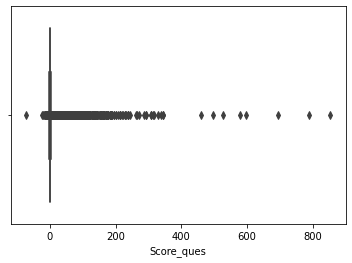

In [ ]:
# In above list there are questions with very high scores as 853 and also very low as -73
# We need to identify the distrbution of score for the question in order to identify a threshold to be considered a good question


# Let us first identify how the scores of questions are distributed
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Score_ques', data=dfgoodquestions)
plt.show()

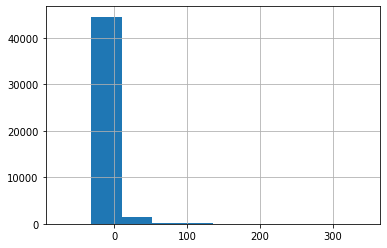

In [ ]:
# In above box plot we can see that the data is continous upto 400 and then discontinous
# Let us how score for top rated questions between 0-400 is distributed

dfgoodquestions[dfgoodquestions['Score_ques'] < 400]['Score_ques'].hist()

In [ ]:
# In above histogram it is clear that the scores for the questions are not normally distributed and there are many negative values
# We cannot use transformations in this case as negative values do represent that they are not good questions
# This means that there was indeed less number of good questions on stack overflow during the period of our analysis.

# In order for a question to be a decent one it should have more upvotes than downvotes which mean it should be greater than 0.
# So let us get the mean score of questions having values more than 0 but at same time less than 400 since after 400 we have non-continous data.
dfgoodquestions[(dfgoodquestions['Score_ques'] > 0) & (dfgoodquestions['Score_ques'] < 400)]['Score_ques'].mean()


6.8565644881434356

In [ ]:
# From above analysis for a question to be considered good it should at least have a score of more than 6.8 (rounded to 7)
# Let us update our good questions data frame as per above condition

dfgoodquestions = dfgoodquestions[(dfgoodquestions['Score_ques'] >= 7)]
dfgoodquestions

# We need to run Amazon Comprehend service on these question title and body to understand the key phrases in these question 
# and the same can be suggested to users to be used while asking questions. Also the syntax of the questions can be analyzed
# to understand how proper questions can be framed.

# Based on above data Stack Overflow can provide suggestions to their users on how to get their questions answered quickly

,Title,Body_ques,Tag,Score_ques
Id_ques,,,,
2862590,"How to replace master branch in git, entirely,...",<blockquote>\n <p><strong>Possible Duplicate:...,"git,merge,git-branch",853
7888880,What is Redis and what do I use it for?,<p>I saw mentions of Redis a few times and I l...,redis,788
218760,How do you keep parents of floated elements fr...,<p>Although elements like <code>&lt;div&gt;</c...,"html,css,layout,css-float",695
61320,What are the pros and cons of the SVN plugins ...,<p>SVN in Eclipse is spread into 2 camps. The ...,"svn,eclipse,subclipse,subversive",596
10732690,offsetting an html anchor to adjust for fixed ...,<p>I am trying to clean up the way my anchors ...,"javascript,html,css,anchor,offset",579
...,...,...,...,...
12825520,CSS3 vs JavaScript: What is the advantage?,"<p>It seems with HTML5/CSS3, there is a larger...","javascript,html,css,html5,css3",7
10993850,Run Java executable without installing JRE?,<blockquote>\n <p><strong>Possible Duplicate:...,"deployment,java,executable-jar",7
11057800,Passing member functions to std::thread,<blockquote>\n <p><strong>Possible Duplicate:...,"c++,multithreading,c++11",7


## Top Trending topics

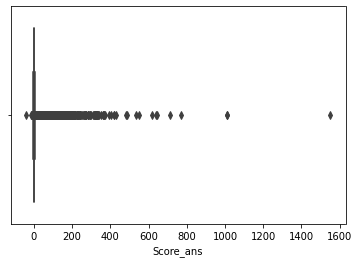

In [ ]:
# To identify top trending topics both questions and answers should have high scores.
# We identified that the threshold for good questions is a score of 7 or more.

# Similarly let us identify the threshold for a good answer
sns.boxplot(x='Score_ans', data=dfmerged)
plt.show()

In [ ]:
# Here also the score for answered are more within 0-400. Let us find mean as above.
dfmerged[(dfmerged['Score_ans'] > 0) & (dfmerged['Score_ans'] < 400)]['Score_ans'].mean()

4.527576301045915

In [ ]:
# Let us identify data with a question score more than or equal to 7 and answer score of more than 4.5 (rounded to 5)
dftoptags = dfmerged[(dfmerged['Score_ques'] >= 7) & (dfmerged['Score_ans'] >= 5)].sort_values(by=['Score_ques','Score_ans'], ascending=False)
dftoptags

,Id_ques,OwnerUserId_ques,CreationDate_ques,ClosedDate,Score_ques,Title,Body_ques,Tag,CreationDate_ans,Score_ans,Body_ans,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
3769251,2862590,220274,2010-05-19 03:06:29+00:00,2012-12-15 15:32:16+00:00,853,"How to replace master branch in git, entirely,...",<blockquote>\n <p><strong>Possible Duplicate:...,"git,merge,git-branch",2010-05-19 04:51:31+00:00,1551.0,"<p>You should be able to use the ""ours"" merge ...",240633,ergosys,2009-12-30 04:20:18.710000+00:00,2019-09-01 02:59:27.803000+00:00,37301,1397,16,1100
3818392,2862590,220274,2010-05-19 03:06:29+00:00,2012-12-15 15:32:16+00:00,853,"How to replace master branch in git, entirely,...",<blockquote>\n <p><strong>Possible Duplicate:...,"git,merge,git-branch",2010-05-19 03:11:43+00:00,242.0,<p>What about using git branch -m to rename th...,111896,ZelluX,2009-05-25 01:28:59.180000+00:00,2019-08-29 22:54:46.140000+00:00,43379,1888,15,4937
98379,2862590,220274,2010-05-19 03:06:29+00:00,2012-12-15 15:32:16+00:00,853,"How to replace master branch in git, entirely,...",<blockquote>\n <p><strong>Possible Duplicate:...,"git,merge,git-branch",2010-05-19 03:57:04+00:00,40.0,"<p>You can rename/remove master on remote, but...",6309,VonC,2008-09-13 22:22:33.173000+00:00,2019-08-31 23:30:47.713000+00:00,888089,50295,268,155016
3818424,2862590,220274,2010-05-19 03:06:29+00:00,2012-12-15 15:32:16+00:00,853,"How to replace master branch in git, entirely,...",<blockquote>\n <p><strong>Possible Duplicate:...,"git,merge,git-branch",2012-07-25 20:44:42+00:00,10.0,<p>since seotweaks was originally created as a...,959352,mholm815,2011-09-22 14:36:39.403000+00:00,2017-03-09 16:15:16.973000+00:00,1574,47,1,36
5429066,7888880,34537,2011-10-25 11:54:46+00:00,2016-09-28 18:52:01+00:00,788,What is Redis and what do I use it for?,<p>I saw mentions of Redis a few times and I l...,redis,2011-10-25 23:55:56+00:00,772.0,<p><strong>TL;DR: If you can map a use case to...,665240,Carl Zulauf,2011-03-17 23:01:35.557000+00:00,2019-08-30 19:05:45.393000+00:00,36205,254,14,1836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049202,24781960,935374,2014-07-16 13:22:35+00:00,2014-07-16 13:43:54+00:00,7,"Why ""int i = (byte) + (char) - (int) + (long) ...",<p>I stumbled upon this code on internet</p>\n...,java,2014-07-16 13:25:29+00:00,5.0,<p>Due to type casting it's equivalent to</p>\...,1385087,Konstantin V. Salikhov,2012-05-09 15:57:48.263000+00:00,2019-08-29 05:36:26.303000+00:00,3849,3275,1517,1257
9068259,25388620,986730,2014-08-19 16:34:54+00:00,2016-08-14 04:01:14+00:00,7,"Debian apt error: ""The following signatures we...",<p>I'm having some trouble with apt/aptitude. ...,"linux,debian,gnupg,apt",2014-11-26 14:59:47+00:00,5.0,<p>Just solved this myself; this question came...,553344,Saiboogu,2010-12-24 13:46:54.173000+00:00,2019-08-22 20:54:53.983000+00:00,161,5,0,13
9250158,30804880,4900911,2015-06-12 13:56:58+00:00,2015-06-16 04:01:02+00:00,7,Is it legal to use IntelliJ's EAP versions for...,"<p>From my understanding, the EAP version has ...",intellij-idea,2015-06-12 16:24:45+00:00,5.0,<p>Yes. If you look at the IDEA*.txt licenses ...,1348743,Javaru,2012-04-21 19:46:10.607000+00:00,2019-08-30 18:36:36.577000+00:00,21846,210,7,521
9365659,34936180,320724,2016-01-21 23:12:32+00:00,2016-01-21 23:47:32+00:00,7,Seeing the SQL that LINQ generates,<p>If I have a LINQ to SQL statement for examp...,"c#,linq",2016-01-21 23:17:57+00:00,5.0,<p>You can also set the Log property of Your c...,444149,Marty,2010-09-10 08:14:16.080000+00:00,2019-08-01 12:45:00.270000+00:00,1619,433,9,320


In [ ]:
# Let us remove the low rated answers in each question since the tags are same.
dftoptags = dftoptags.groupby(['Id_ques','Tag','Score_ques'])['Score_ans'].max().reset_index().sort_values(by=['Score_ques','Score_ans'], ascending=False)
dftoptags

,Id_ques,Tag,Score_ques,Score_ans
829,2862590,"git,merge,git-branch",853,1551.0
1527,7888880,redis,788,772.0
150,218760,"html,css,layout,css-float",695,353.0
62,61320,"svn,eclipse,subclipse,subversive",596,164.0
1778,10732690,"javascript,html,css,anchor,offset",579,620.0
...,...,...,...,...
2386,21381190,"python,list,sorting,view,slice",7,5.0
2479,25388620,"linux,debian,gnupg,apt",7,5.0
2545,30804880,intellij-idea,7,5.0
2584,34936180,"c#,linq",7,5.0


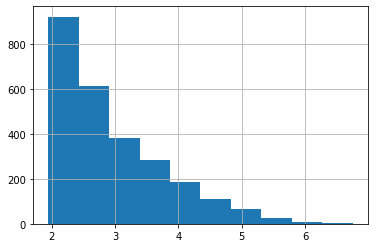

In [ ]:
# Now let us try logarthmic transformation for the Score_ques and Score_ans to get a normal distribution
dftoptags['Score_ques'].apply(np.log).hist()

# The question score seems to be skewed to a extent that even after transformation it is not normal distrbution

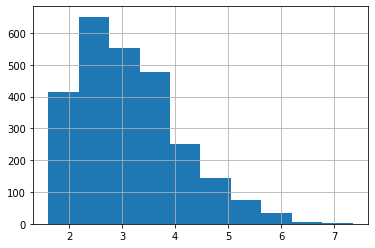

In [ ]:
# Checking log transform for answer score
dftoptags['Score_ans'].apply(np.log).hist()

In [ ]:
# Since logarthmic transformation kind of makes the answer scores normal let us first transform answer score alone
dftoptags['Score_ans'] = dftoptags['Score_ans'].apply(np.log)

In [ ]:
# Let us now find the mean for answer score
dftoptags['Score_ans'].mean()

3.116483500204326

In [ ]:
# Filtering the data further to get only topics having more than normalized answer score of 3.2 (i.e.) above average
dftoptags = dftoptags[dftoptags['Score_ans'] > 3.2].sort_values(by=['Score_ques','Score_ans'], ascending=False)
dftoptags

,Id_ques,Tag,Score_ques,Score_ans
829,2862590,"git,merge,git-branch",853,7.346655
1527,7888880,redis,788,6.648985
150,218760,"html,css,layout,css-float",695,5.866468
62,61320,"svn,eclipse,subclipse,subversive",596,5.099866
1778,10732690,"javascript,html,css,anchor,offset",579,6.429719
...,...,...,...,...
1005,3706470,"java,core",7,3.367296
1930,12763890,"r,na",7,3.367296
320,643050,c#,7,3.332205
2235,17598350,"sql,sql-server,sql-server-2008,tsql",7,3.332205


In [ ]:
# Now we have to decide on whether to consider top half of the data or 1/4 of data to get top tags
# Let us for now take the top 1/4

dftoptags.head(250)

,Id_ques,Tag,Score_ques,Score_ans
829,2862590,"git,merge,git-branch",853,7.346655
1527,7888880,redis,788,6.648985
150,218760,"html,css,layout,css-float",695,5.866468
62,61320,"svn,eclipse,subclipse,subversive",596,5.099866
1778,10732690,"javascript,html,css,anchor,offset",579,6.429719
...,...,...,...,...
153,226970,open-source,70,4.248495
581,1624060,"c#,machine-learning",70,3.583519
1973,13352080,"css,match",69,5.036953
767,2523430,"jsp,servlets",69,4.962845


In [ ]:
# From the above list the top tags can be got. #For example the top 10 are as give below.
dftoptags.head(10)

,Id_ques,Tag,Score_ques,Score_ans
829,2862590,"git,merge,git-branch",853,7.346655
1527,7888880,redis,788,6.648985
150,218760,"html,css,layout,css-float",695,5.866468
62,61320,"svn,eclipse,subclipse,subversive",596,5.099866
1778,10732690,"javascript,html,css,anchor,offset",579,6.429719
67,65820,"c,unit-testing,testing,embedded",526,5.697093
44,43180,"operating-system,kernel,osdev",496,4.330733
1314,5871730,"django,file,upload",460,6.916715
1044,3950260,"ruby,ubuntu-9.10,rvm",344,6.463029
1247,5306640,"css,css3,layout,colors,html-lists",343,6.566672


## Univariate/Segmented Univariate analysis

In [ ]:
# Let us print various columns we have in order to do a univariate analysis
dfmerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95805 entries, 0 to 9432355
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Id_ques            95805 non-null  int64              
 1   OwnerUserId_ques   95805 non-null  int64              
 2   CreationDate_ques  95805 non-null  datetime64[ns, UTC]
 3   ClosedDate         95805 non-null  datetime64[ns, UTC]
 4   Score_ques         95805 non-null  int64              
 5   Title              95805 non-null  object             
 6   Body_ques          95805 non-null  object             
 7   Tag                95805 non-null  object             
 8   CreationDate_ans   95805 non-null  datetime64[ns, UTC]
 9   Score_ans          95805 non-null  float64            
 10  Body_ans           95805 non-null  object             
 11  id                 95805 non-null  int64              
 12  display_name       95797 non-null  object   

In [ ]:
# Let us try to get the top 50 authors. For this we can use the authors dataframe itself.
dftop50 = dfu.drop_duplicates().sort_values(by='reputation',ascending=False).head(50)
dftop50['display_name']

110999                  Jon Skeet
35238                        VonC
69941                      BalusC
188604             Darin Dimitrov
1151850             Gordon Linoff
85414                Marc Gravell
67826                Hans Passant
337113                CommonsWare
168856            Martijn Pieters
407215               T.J. Crowder
90506                       SLaks
11290                Greg Hewgill
307743                    Quentin
74250                   paxdiablo
305689              Alex Martelli
1038756           dasblinkenlight
81558                         CMS
460869                 Mark Byers
155164     Ignacio Vazquez-Abrams
193718                     marc_s
120043                   JaredPar
62574            Jonathan Leffler
449435                     unutbu
328230                Felix Kling
262212                      Guffa
790325                   JB Nizet
321566               Eric Lippert
842861                   anubhava
83388                 Nick Craver
594355        

/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimes.py:1104: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


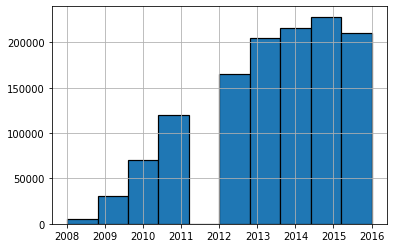

In [ ]:
# Let us try to identify the period on which most questions were asked
import datetime as dt
dfq['year'] = dfq['CreationDate'].dt.to_period('Y')
dfq['year'] = dfq['year'].apply(lambda x: x.strftime('%Y'))

dfq['year'].hist(edgecolor='black', linewidth=1.2)

# Here we can see that it was between 2014 - 2015 that most questions were asked 

/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimes.py:1104: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


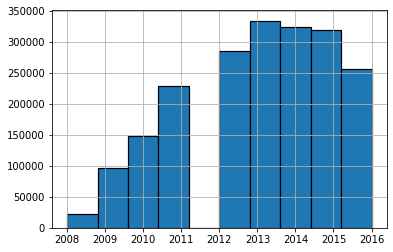

In [ ]:
# Let us try to identify the period on which most questions were answered
dfa['year'] = dfa['CreationDate'].dt.to_period('Y')
dfa['year'] = dfa['year'].apply(lambda x: x.strftime('%Y'))

dfa['year'].hist(edgecolor='black', linewidth=1.2)

# Here we can see that it was between 2013 - 2014 that most questions were answered

## Bivariate analysis

In [ ]:
dfmerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95805 entries, 0 to 9432355
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Id_ques            95805 non-null  int64              
 1   OwnerUserId_ques   95805 non-null  int64              
 2   CreationDate_ques  95805 non-null  datetime64[ns, UTC]
 3   ClosedDate         95805 non-null  datetime64[ns, UTC]
 4   Score_ques         95805 non-null  int64              
 5   Title              95805 non-null  object             
 6   Body_ques          95805 non-null  object             
 7   Tag                95805 non-null  object             
 8   CreationDate_ans   95805 non-null  datetime64[ns, UTC]
 9   Score_ans          95805 non-null  float64            
 10  Body_ans           95805 non-null  object             
 11  id                 95805 non-null  int64              
 12  display_name       95797 non-null  object   

In [ ]:
# Let us identify how the reputation varies based on the number of answers given by the author
dfrepans = pd.pivot_table(dfmerged, values='CreationDate_ans', index=['display_name','reputation'], aggfunc=lambda x: len(x.unique())).reset_index()
dfrepans.sort_values(by='reputation',ascending=False, inplace=True)
dfrepans

,display_name,reputation,CreationDate_ans
17378,Jon Skeet,1128126,143
36906,VonC,888089,42
4330,BalusC,884381,53
8517,Darin Dimitrov,873733,62
13059,Gordon Linoff,851064,83
...,...,...,...
16327,Jennifer,1,1
33258,Steffen KÃÂ¼nstler,1,1
49440,rahul,1,1
27798,Prerana Jana,1,1


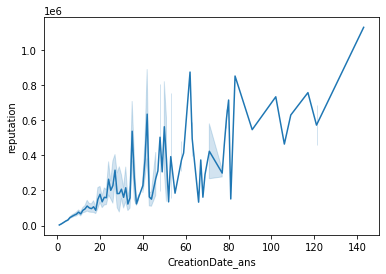

In [ ]:
# Let us try to plot a line plot to understand the above question
sns.lineplot(x='CreationDate_ans',y='reputation',data=dfrepans)
plt.show()

# As seen below we can see that reputation increases till 120 with some fluctuations but after 120 it raises very sharp
# Though the last data point can be an outlier, we can still say that as the author answers more questions 
# the reputation incrases gradually but not at once

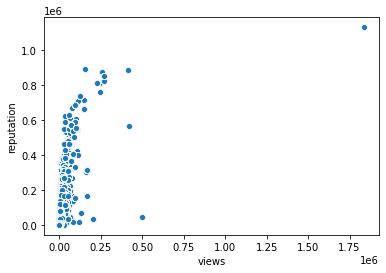

In [ ]:
# Let us see how reputation varies based on the number of views the author's profile was viewed
sns.scatterplot(x='views',y='reputation',data=dfu)
plt.show()

# In below scatter plot we can see there is no relation between views and reputation and even for less view there are high reputation
# There seems to be just 1 point where there are more view the reputation is also high

In [ ]:
# Let us identify how the reputation, views varies based on the number of questions answered by the author
dfathranalys = pd.pivot_table(dfmerged, values=['CreationDate_ans'], index=['display_name','reputation','views'], aggfunc=lambda x: len(x.unique())).reset_index()
dfathranalys.sort_values(by=['reputation','views'], ascending=False, inplace=True)

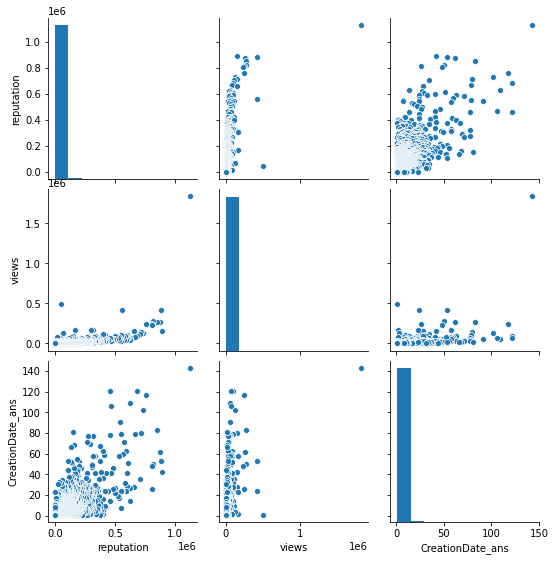

In [ ]:
sns.pairplot(dfathranalys)
plt.show()

# From below plot we can identify multiple results:
# 1. Reputation increases with number of answers as we found already
# 2. There is no direct relationship between number of views and number of questions answered. 
# Like even for those who answered more the profile views are less. This makes sense as rarely people view profile of people in Stack Overflow.
# 3. There seems to be not much relationship between reputation and views too as even for highly reputed profile, the views are less. 

In [ ]:
# Let us now merge the dataframes however based on number of questions raised rather than the number of questions answered.
# For this we just need to change the condition by which we merged the users table.

# Merging the questions and Tags dataframe based on Id
dfquesmerged = pd.merge(dfq,dft,how='left',suffixes=('_ques','_tag'))

# Removing questions without tags
dfquesmerged = dfquesmerged[~dfquesmerged['Tag'].isnull()]

# Now let us remove the duplicate rows by merging the Tags with comma as delimiter
dfquesmerged = dfquesmerged.groupby(['Id','OwnerUserId','CreationDate','ClosedDate','Score','Title','Body'])['Tag'].apply(','.join).reset_index()

# Merging the questions, tags with answers table
dfquesmerged = pd.merge(dfquesmerged,dfa,how='left',suffixes=('_ques','_ans'), left_on='Id', right_on='ParentId')
dfquesmerged = pd.merge(dfquesmerged,dfu,suffixes=('','_user'), left_on='OwnerUserId_ques', right_on='id')
dfquesmerged.drop_duplicates(inplace=True)

dfquesmerged

,Id_ques,OwnerUserId_ques,CreationDate_ques,ClosedDate,Score_ques,Title,Body_ques,Tag,Id_ans,OwnerUserId_ans,CreationDate_ans,ParentId,Score_ans,Body_ans,year,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn,tortoisesvn,branch,branching-and-merging",92.0,61.0,2008-08-01 14:45:37+00:00,90.0,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",2008,58,cmcculloh,2008-08-01 13:56:33.807000+00:00,2019-08-27 16:56:31.030000+00:00,24807,1047,55,1795
3,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn,tortoisesvn,branch,branching-and-merging",202317.0,20709.0,2008-10-14 18:41:45+00:00,90.0,2.0,"<p>You can also try <em><a href=""http://www.co...",2008,58,cmcculloh,2008-08-01 13:56:33.807000+00:00,2019-08-27 16:56:31.030000+00:00,24807,1047,55,1795
6,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn,tortoisesvn,branch,branching-and-merging",1466832.0,16012.0,2009-09-23 15:40:46+00:00,90.0,19.0,<p>My easy click-by-click instructions (<stron...,2009,58,cmcculloh,2008-08-01 13:56:33.807000+00:00,2019-08-27 16:56:31.030000+00:00,24807,1047,55,1795
9,2970,58,2008-08-05 23:55:25+00:00,2012-03-06 03:17:01+00:00,17,My website got hacked... What should I do?,<p>My dad called me today and said people goin...,"security,cracking,hijacked",2973.0,92.0,2008-08-06 00:00:22+00:00,2970.0,3.0,"<p>With a six word character password, he may ...",2008,58,cmcculloh,2008-08-01 13:56:33.807000+00:00,2019-08-27 16:56:31.030000+00:00,24807,1047,55,1795
12,2970,58,2008-08-05 23:55:25+00:00,2012-03-06 03:17:01+00:00,17,My website got hacked... What should I do?,<p>My dad called me today and said people goin...,"security,cracking,hijacked",2976.0,204.0,2008-08-06 00:16:07+00:00,2970.0,13.0,<p>Try and gather as much information as you c...,2008,58,cmcculloh,2008-08-01 13:56:33.807000+00:00,2019-08-27 16:56:31.030000+00:00,24807,1047,55,1795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517961,40138080,4652360,2016-10-19 17:37:34+00:00,2016-10-19 17:39:44+00:00,0,Java - read a (not perfect) csv file,"<p>I am trying to read a CSV file. However, th...","java,csv,io",NaN,NaN,NaT,NaN,NaN,NaN,NaN,4652360,Jason Christopher,2015-03-10 04:23:54.510000+00:00,2017-11-26 15:27:14.233000+00:00,75,5,0,23
517962,40138250,2066128,2016-10-19 17:46:35+00:00,2016-10-19 23:54:21+00:00,-5,Convert string path variable to fullpath,"<p><code>String filepath=""C:\temp\""</code>is r...","c#,.net,c#-4.0",NaN,NaN,NaT,NaN,NaN,NaN,NaN,2066128,Chat,2013-02-12 20:13:53.333000+00:00,2019-08-09 06:30:28.200000+00:00,88,19,0,48
517963,40138500,3098658,2016-10-19 17:59:59+00:00,2016-10-19 18:24:49+00:00,0,Better way of passing data between pages: HTML...,<p>I am trying to pass data between two pages ...,"javascript,angularjs,html5",40138602.0,7043764.0,2016-10-19 18:05:19+00:00,40138500.0,0.0,"<p>This answer - <a href=""http://stackoverflow...",2016,3098658,BlueSword,2013-12-13 08:55:55.787000+00:00,2019-06-24 20:36:25.777000+00:00,1044,131,33,203
517970,40138710,2728397,2016-10-19 18:12:25+00:00,2016-10-19 18:20:34+00:00,0,"list containing function objects(unique), retu...",<p>I have this list containing function object...,"python,list,python-3.x,lambda",NaN,NaN,NaT,NaN,NaN,NaN,NaN,2728397,R__raki__,2013-08-29 08:25:06.623000+00:00,2019-08-31 11:43:35.647000+00:00,303,1110,296,160


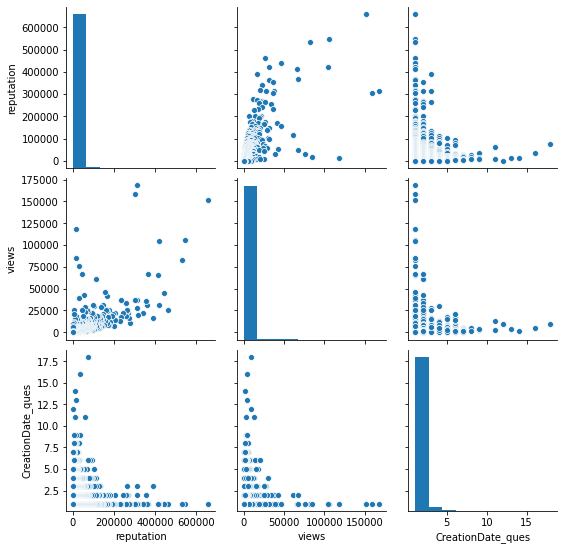

In [ ]:
# Let us identify how the reputation, views varies based on the number of questions asked by the author
dfathquesranalys = pd.pivot_table(dfquesmerged, values=['CreationDate_ques'], index=['display_name','reputation','views'], aggfunc=lambda x: len(x.unique())).reset_index()
dfathquesranalys.sort_values(by=['reputation','views'], ascending=False, inplace=True)

sns.pairplot(dfathquesranalys)
plt.show()

# Now as you can see the plot is different when plotted with number of questions raised:
# 1. There seems to be no direct relation between number of questions asked and reputation as even for those with less questiions, reputation is more
# 2. In this plot too there is no much direct relation between views and reputation
# 3. Also there seems to be no direct relation between number of questions asked and views 

# From above analysis looks like reputation of an person is more influenced by the number of answers they answer 
# rather than the number of questions they ask which makes sense as the objective of Stack Overflow is to give answers.